In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [2]:
from Data.Understat_Data import scrape_match_shots
from mplsoccer import Pitch
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from Pitch.My_Pitch import myPitch
from ShotMaps import rescale_shot_data
import seaborn as sns


# Get and handle data

In [5]:
shot_data = scrape_match_shots(23092)

shot_data

,x,y,xG,minute,team,player,result
0,0.9780000305175781,0.645,0.06122203916311264,1,Bayern Munich,Serge Gnabry,MissedShots
1,0.885,0.36900001525878906,0.0893462523818016,2,Bayern Munich,Konrad Laimer,SavedShot
2,0.9769999694824218,0.5529999923706055,0.44887444376945496,6,Bayern Munich,Harry Kane,Goal
3,0.825999984741211,0.5279999923706055,0.0744374692440033,10,Bayern Munich,Leroy Sané,MissedShots
4,0.9059999847412109,0.4490000152587891,0.035625848919153214,34,Bayern Munich,Thomas Müller,SavedShot
5,0.9430000305175781,0.37099998474121093,0.08736156672239304,34,Bayern Munich,Serge Gnabry,BlockedShot
6,0.78,0.49700000762939456,0.03352933004498482,42,Bayern Munich,Leroy Sané,SavedShot
7,0.870999984741211,0.5520000076293945,0.07283549010753632,42,Bayern Munich,Kim Min-Jae,BlockedShot
8,0.9169999694824219,0.5729999923706055,0.10061626881361008,43,Bayern Munich,Leon Goretzka,SavedShot
9,0.9409999847412109,0.6980000305175781,0.2982063293457031,44,Bayern Munich,Serge Gnabry,SavedShot


In [6]:
shot_data2 = rescale_shot_data(shot_data=shot_data, data_source='Understat')
shot_data2

,x,y,xG,minute,team,player,result
0,117.360004,28.400000,0.06,1,Bayern Munich,Serge Gnabry,MissedShots
1,106.200000,50.479999,0.09,2,Bayern Munich,Konrad Laimer,SavedShot
2,117.239996,35.760001,0.45,6,Bayern Munich,Harry Kane,Goal
3,99.119998,37.760001,0.07,10,Bayern Munich,Leroy Sané,MissedShots
4,108.719998,44.079999,0.04,34,Bayern Munich,Thomas Müller,SavedShot
5,113.160004,50.320001,0.09,34,Bayern Munich,Serge Gnabry,BlockedShot
6,93.600000,40.239999,0.03,42,Bayern Munich,Leroy Sané,SavedShot
7,104.519998,35.839999,0.07,42,Bayern Munich,Kim Min-Jae,BlockedShot
8,110.039996,34.160001,0.10,43,Bayern Munich,Leon Goretzka,SavedShot
9,112.919998,24.159998,0.30,44,Bayern Munich,Serge Gnabry,SavedShot


# Create shot map (sns)

<Axes: xlabel='x', ylabel='y'>

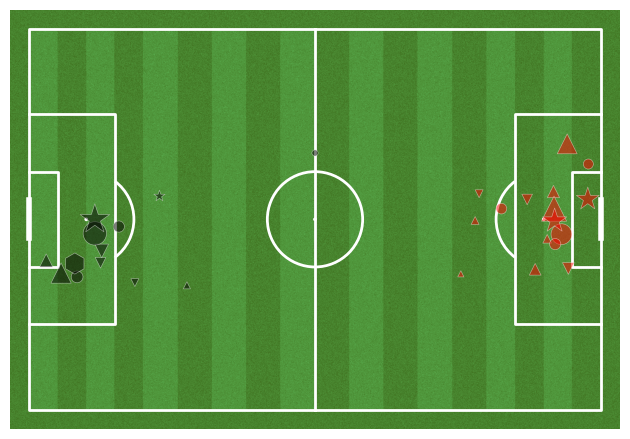

In [8]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
sns.scatterplot(data=shot_data2, x='x', y='y', hue='team', style='result', size='xG', sizes=(20,500),
                               markers={'SavedShot': "^", 'MissedShots': 'o', 'BlockedShot': "v", 'Goal': '*',
                                        'OwnGoal': 'X', 'ShotOnPost': "h"},
                alpha = 0.5, legend=False, palette = {'Bayern Munich' : 'red', 'Bayer Leverkusen': 'black'})